In [6]:
import pandas as pd
import numpy as np
from tqdm import tqdm 

from geopy.distance import geodesic as d
DIR = './Data/'

In [3]:
acc_cols = ['accident_index','longitude', 'latitude', 'date']
acc_df = pd.read_csv(DIR+'acc_clean.csv', usecols = acc_cols)
pubs_df = pd.read_csv(DIR+'pubs_clean.csv')

In [4]:
acc_df['date'] = pd.to_datetime(acc_df['date'], infer_datetime_format=True)

### Aggr the number of accidents (2000 - 2020) around each Pub

In [7]:
for index, row in tqdm(pubs_df.iterrows(), total=pubs_df.shape[0]):
    
    lat = row.latitude
    long = row.longitude
    year_counts = acc_df[((acc_df.latitude <=  lat + 0.0069) & (acc_df.latitude >= lat - 0.0069)) & 
                ((acc_df.longitude <= long + 0.022) & (acc_df.longitude  >= long - 0.022))]['date'].dt.year.value_counts().astype(str).to_dict()
    pubs_df.loc[index, year_counts.keys()] = year_counts.values()# index
    # break

100%|██████████| 51494/51494 [1:14:50<00:00, 11.47it/s]


In [8]:
pubs_df.to_csv(DIR+'pubs_acc_yearly_counts.csv',index=False)

In [9]:
# convert column name trype from int to string 
pubs_df.columns = pubs_df.columns.map(str)
#sort the columns based on column names
df = pubs_df.reindex(sorted(pubs_df.columns[1:]), axis=1)

In [10]:
for col in df.iloc[:,:21].columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(np.int64)

In [11]:
# filter out rows with a downward trend
# https://stackoverflow.com/questions/49359474/how-to-determine-the-trend-of-a-numeric-list-in-python

from itertools import islice

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

for index, row in islice(df.iterrows(),0,None):
    # print(np.array(row[:21]))
    if(np.all(np.diff(moving_average(np.array(row[:21]), n=4))>0)):
        print(index,np.array(row[:21]))
        break

In [ ]:
import seaborn as sns

sns.set_theme()
# sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


<AxesSubplot:>

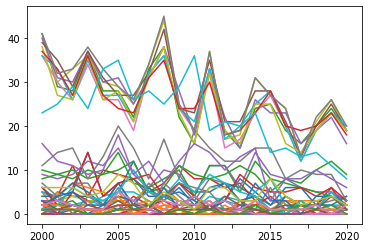

In [13]:
df.iloc[:,:21].head(50).T.plot(legend=False)